In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df1=pd.read_csv(r'D:\MACHINE LEARNING PROJECT\py-master\DataScience\BangloreHomePrices\model\bengaluru_house_prices.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.head()
df1.shape

(13320, 9)

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)
df2.shape

(13320, 5)

DATA PREPROCESSING

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3=df2.dropna()

In [11]:
df3.shape

(13246, 5)

Featuring Scaling

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x :int(x.split(' ')[0]))

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

CONDITION

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def float_x(i):
    try:
        float(i)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(float_x)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens=x.split(' - ')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [21]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [22]:
df4 = df4[df4.total_sqft.notnull()]


In [23]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [25]:
df5=df4.copy()
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [27]:
type(df5['price'])

pandas.core.series.Series

In [28]:
df5['price_per_sqft']=df5['price'].astype('float')*10000/df5['total_sqft'].astype('float')
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [29]:
len(df5['location'].unique())

1298

In [30]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [31]:
len(location_stat[location_stat<=10])

1047

In [32]:
location_stat.values.sum()

13200

In [33]:
location_less_10=location_stat[location_stat>10]
len(location_less_10)

240

In [34]:
location_stats_less_than_10 = location_stat[location_stat<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [35]:
len(df5.location.unique())

1287

In [36]:
df5.location=df5.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x)

In [37]:
len(df5.location.unique())

241

In [38]:
df5.shape

(13200, 7)

In [39]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,668.983493
13316,other,4 BHK,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,1040.733632


In [40]:
df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,1557.142857
13279,other,6 Bedroom,1200.0,5.0,130.0,6,1083.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,909.090909
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,904.392765


In [41]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [42]:
df6.shape

(12456, 7)

In [43]:
df6.price_per_sqft.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [44]:
def remove_pps_outliners(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliners(df6)
df7.shape


(10242, 7)

In [45]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [46]:
# lower bedroom and high price
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

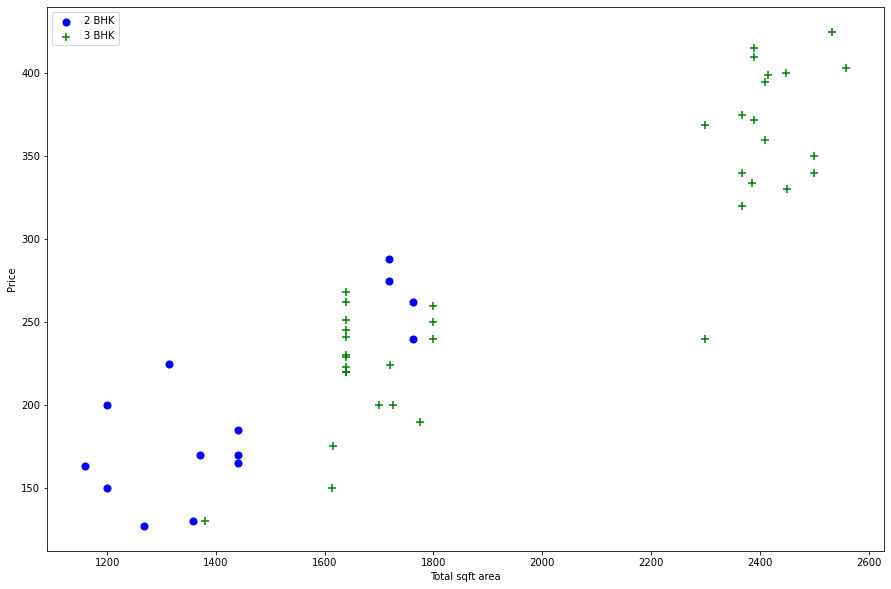

In [47]:
plot_scatter_chart(df7,'Rajaji Nagar')

In [48]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,1198.380567
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,813.008130
10238,other,1 Bedroom,812.0,1.0,26.00,1,320.197044
10239,other,3 BHK,1440.0,2.0,63.93,3,443.958333
10240,other,2 BHK,1075.0,2.0,48.00,2,446.511628


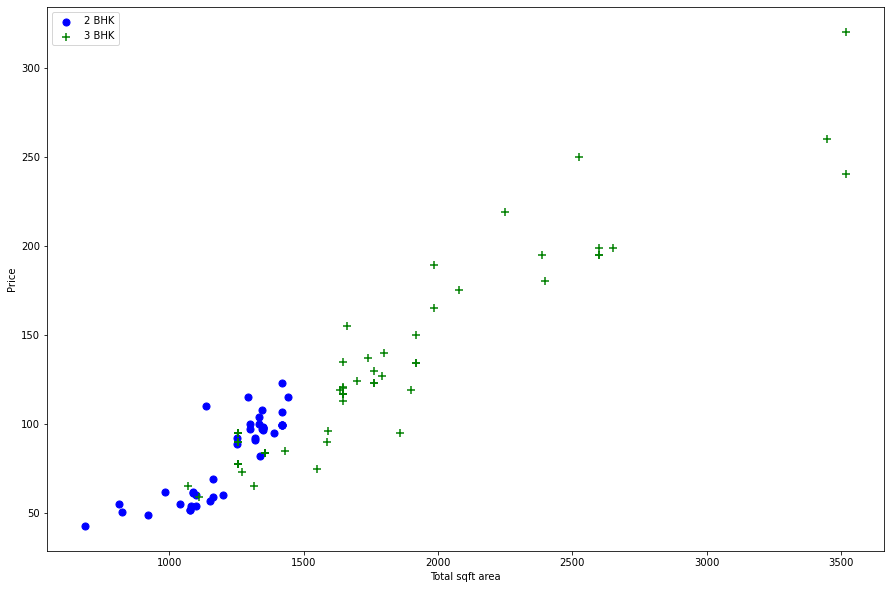

In [49]:
plot_scatter_chart(df7,'Hebbal')

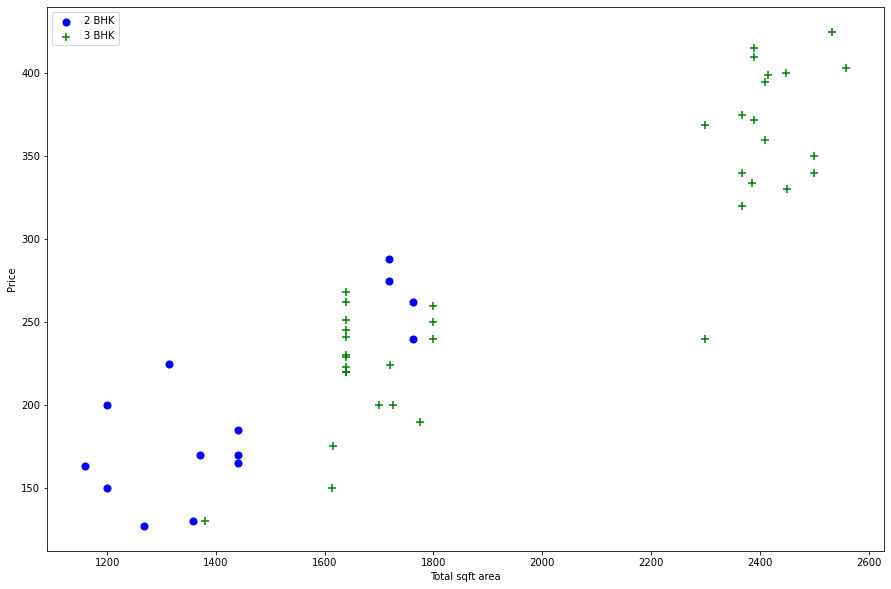

In [50]:
plot_scatter_chart(df7,'Rajaji Nagar')

In [51]:
#2BHK and 3BHK Dict means ,std, count
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

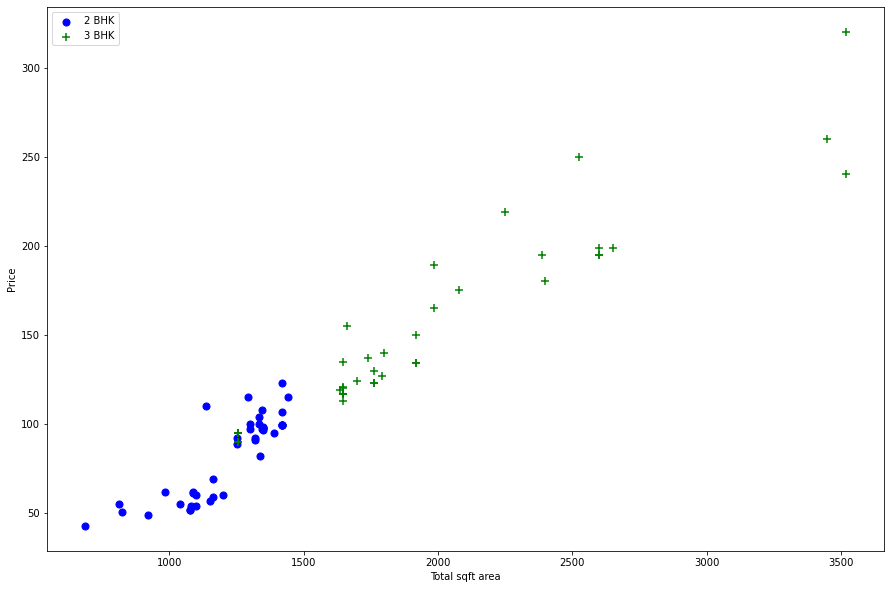

In [52]:
plot_scatter_chart(df8,'Hebbal')

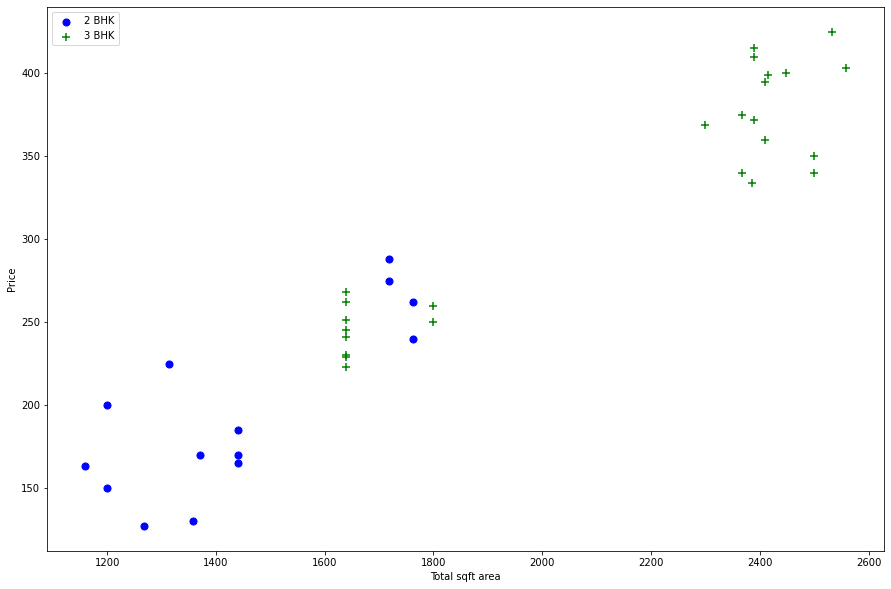

In [53]:
plot_scatter_chart(df8,'Rajaji Nagar')

In [54]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567
...,...,...,...,...,...,...,...
10233,other,2 BHK,1200.0,2.0,70.0,2,583.333333
10234,other,1 BHK,1800.0,1.0,200.0,1,1111.111111
10237,other,2 BHK,1353.0,2.0,110.0,2,813.008130
10238,other,1 Bedroom,812.0,1.0,26.0,1,320.197044


Text(0, 0.5, 'Count')

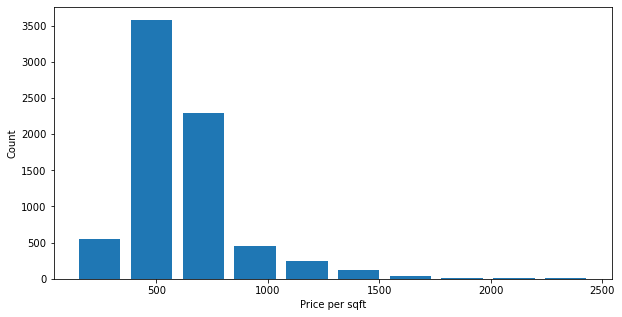

In [55]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [56]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [57]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8572,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,506.912442


Text(0, 0.5, 'Count')

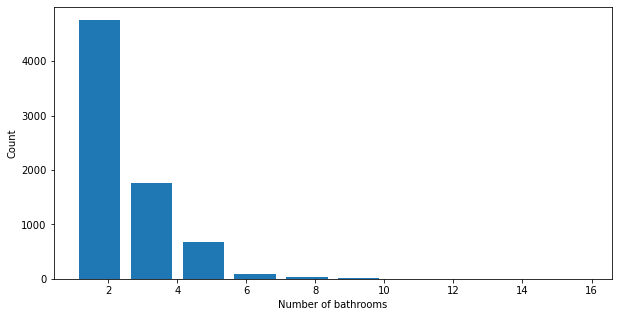

In [58]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [59]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8572,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,506.912442


In [60]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8408,other,6 BHK,11338.0,9.0,1000.0,6,881.989769


In [61]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [62]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [63]:
dummies=pd.get_dummies(df10['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis=1)

In [65]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12=df11.drop('location',axis=1)

In [67]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y=df12.price

In [69]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7239, dtype: float64

In [70]:
x=df12.drop('price',axis=1)

In [71]:
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.827025463655214

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [75]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [76]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726779,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715684,"{'criterion': 'mse', 'splitter': 'best'}"


In [77]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [78]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X= np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]

In [79]:
predict_price('Indira Nagar',1000, 2, 2)

177.1641125546248

In [80]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))